Anahel Ginés Delgado Almeida

#1. Función general para entrenar y graficar

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def evaluar_y_graficar(modelo, Xtrain, Xtest, ytrain, ytest, titulo):
    modelo.fit(Xtrain, ytrain)
    y_pred = modelo.predict(Xtest)
    acc = accuracy_score(ytest, y_pred)

    cm = confusion_matrix(ytest, y_pred, labels=modelo.classes_)
    disp = ConfusionMatrixDisplay(cm, display_labels=modelo.classes_)

    plt.figure(figsize=(6,6))
    plt.title(f"{titulo}\nPrecisión: {acc:.2f}", fontsize=14, weight="bold")
    disp.plot(cmap="Blues", values_format="d")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return acc

#2. Dataset Iris

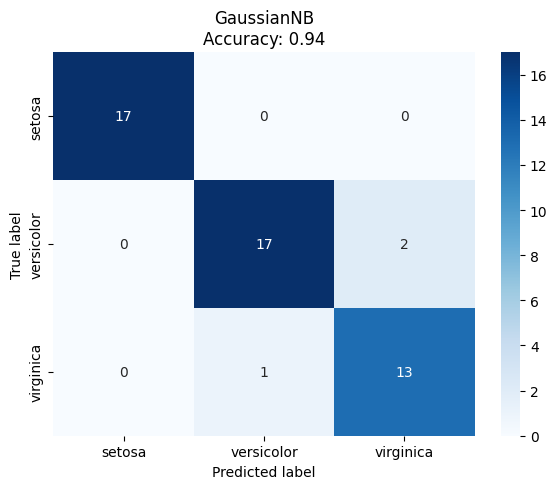

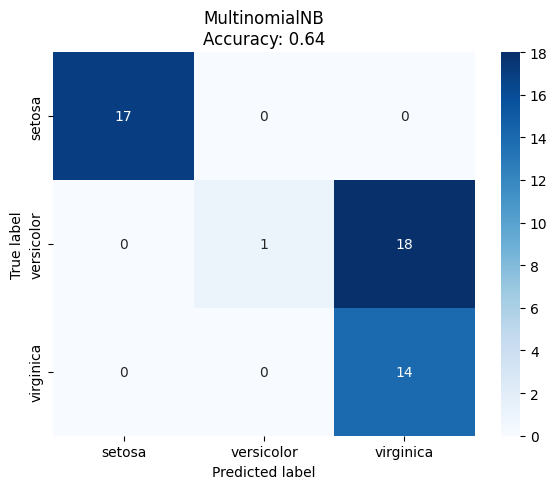

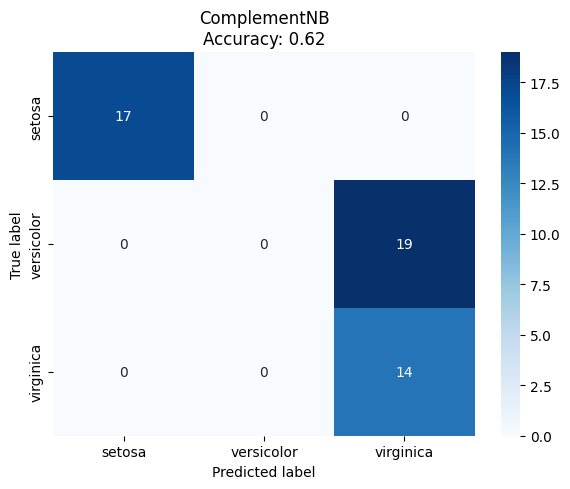

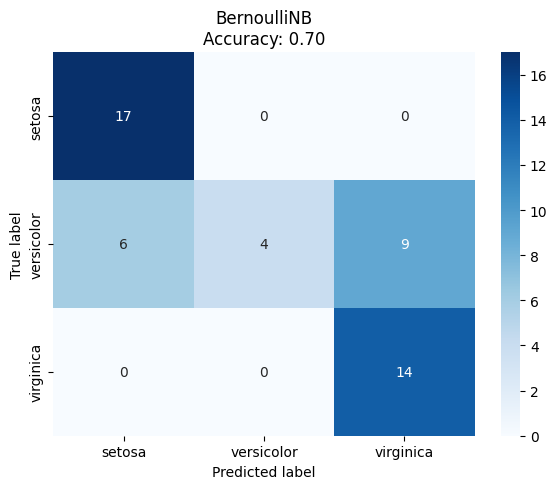

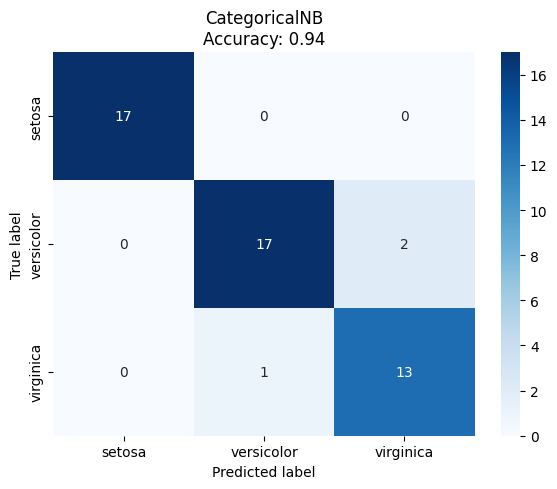

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import (GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB)
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import KBinsDiscretizer

# Cargar dataset
iris = sns.load_dataset("iris")
X = iris.drop("species", axis=1)
y = iris["species"]

# Train / Test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=1)

# Función de evaluación y gráfica
def evaluar_y_graficar(modelo, Xtrain, Xtest, ytrain, ytest, nombre):
    # Entrenar modelo
    modelo.fit(Xtrain, ytrain)
    ypred = modelo.predict(Xtest)
    # Accuracy
    acc = accuracy_score(ytest, ypred)
    # Matriz de confusión
    labels = sorted(y.unique())
    cm = confusion_matrix(ytest, ypred, labels=labels)
    # Gráfica
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title(f"{nombre}\nAccuracy: {acc:.2f}")
    plt.tight_layout()
    plt.show()

# 1. GaussianNB
evaluar_y_graficar(GaussianNB(), Xtrain, Xtest, ytrain, ytest, "GaussianNB")

# 2. MultinomialNB
evaluar_y_graficar(MultinomialNB(), Xtrain.abs(), Xtest.abs(), ytrain, ytest, "MultinomialNB")

# 3. ComplementNB
evaluar_y_graficar(ComplementNB(), Xtrain.abs(), Xtest.abs(), ytrain, ytest, "ComplementNB")

# 4. BernoulliNB
Xtrain_bin = (Xtrain > Xtrain.median()).astype(int)
Xtest_bin  = (Xtest  > Xtrain.median()).astype(int)
evaluar_y_graficar(BernoulliNB(), Xtrain_bin, Xtest_bin, ytrain, ytest, "BernoulliNB")

# 5. CategoricalNB
kbd = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
Xtrain_cat = kbd.fit_transform(Xtrain)
Xtest_cat  = kbd.transform(Xtest)
evaluar_y_graficar(CategoricalNB(), Xtrain_cat, Xtest_cat, ytrain, ytest, "CategoricalNB")

#3. Dataset Penguins

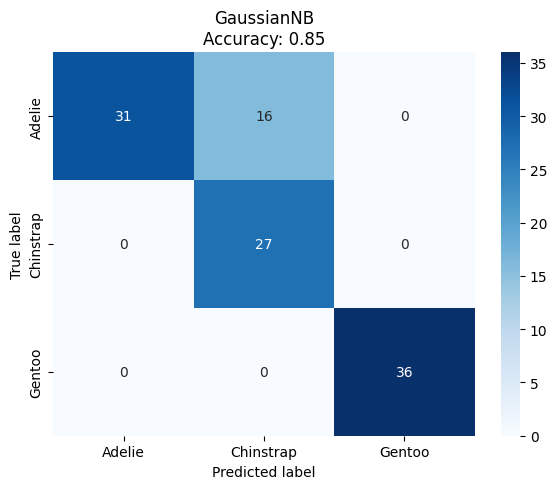

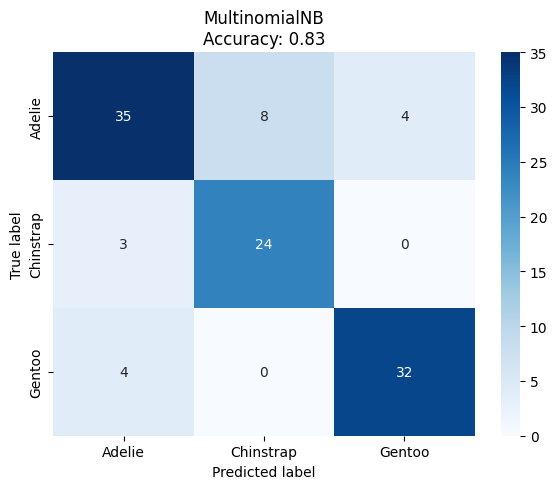

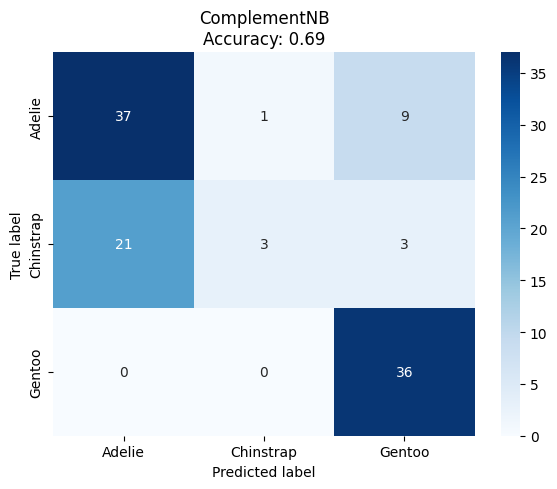

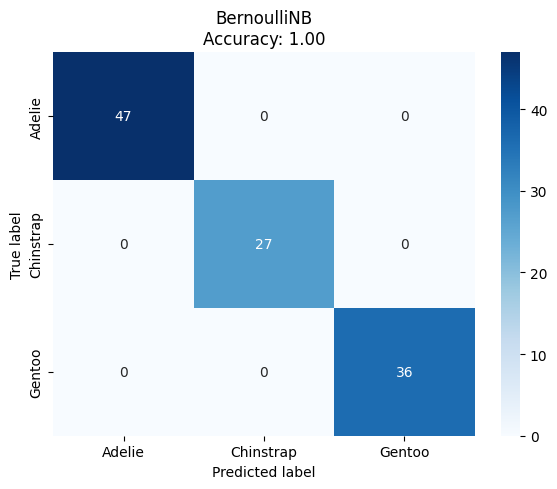

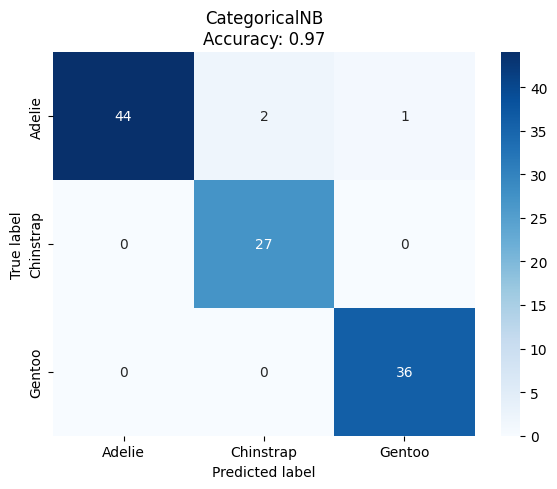

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import (GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB)
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import KBinsDiscretizer

# Cargar dataset
penguins = sns.load_dataset("penguins").dropna()

X = penguins.drop("species", axis=1)
y = penguins["species"]

# Convertir variables categóricas a dummies
X = pd.get_dummies(X)

# Train / Test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=1)

# Función de evaluación y gráfica
def evaluar_y_graficar(modelo, Xtrain, Xtest, ytrain, ytest, nombre):
    modelo.fit(Xtrain, ytrain)
    ypred = modelo.predict(Xtest)
    acc = accuracy_score(ytest, ypred)
    labels = sorted(y.unique())
    cm = confusion_matrix(ytest, ypred, labels=labels)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title(f"{nombre}\nAccuracy: {acc:.2f}")
    plt.tight_layout()
    plt.show()

# 1. GaussianNB
evaluar_y_graficar(GaussianNB(), Xtrain, Xtest, ytrain, ytest, "GaussianNB")

# 2. MultinomialNB
evaluar_y_graficar( MultinomialNB(), Xtrain.abs(), Xtest.abs(), ytrain, ytest, "MultinomialNB")

# 3. ComplementNB
evaluar_y_graficar(ComplementNB(), Xtrain.abs(), Xtest.abs(), ytrain, ytest, "ComplementNB")

# 4. BernoulliNB
Xtrain_bin = (Xtrain > Xtrain.median()).astype(int)
Xtest_bin  = (Xtest  > Xtrain.median()).astype(int)
evaluar_y_graficar( BernoulliNB(), Xtrain_bin, Xtest_bin, ytrain, ytest, "BernoulliNB")

# 5. CategoricalNB
kbd = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
Xtrain_cat = kbd.fit_transform(Xtrain)
Xtest_cat  = kbd.transform(Xtest)
evaluar_y_graficar(CategoricalNB(), Xtrain_cat, Xtest_cat, ytrain, ytest, "CategoricalNB")